<a href="https://colab.research.google.com/github/juny6287/github-slideshow/blob/my_slide/TEAM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,198 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and d

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

%matplotlib inline
plt.rc('font', family='NanumBarunGothic') 

In [3]:
lclb = pd.read_stata('/content/drive/MyDrive/Colab Notebooks/팀플/lendingclub.dta')
lclb

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,...,mths_since_recent_bc4,mths_since_recent_bc5,mths_since_recent_bc6,mths_since_recent_bc7,mths_since_recent_bc8,mths_since_recent_bc9,mths_since_recent_bc10,mths_since_recent_bc11,mths_since_recent_bc_dlq1,mths_since_recent_bc_dlq2,mths_since_recent_bc_dlq3,mths_since_recent_bc_dlq4,mths_since_recent_bc_dlq5,mths_since_recent_bc_dlq6,mths_since_recent_bc_dlq7,mths_since_recent_bc_dlq8,mths_since_recent_bc_dlq9,mths_since_recent_bc_dlq10,mths_since_recent_bc_dlq11,mths_since_recent_inq1,mths_since_recent_inq2,mths_since_recent_inq3,mths_since_recent_inq4,mths_since_recent_inq5,mths_since_recent_inq6,mths_since_recent_inq7,mths_since_recent_inq8,mths_since_recent_inq9,mths_since_recent_inq10,mths_since_recent_revol_delinq1,mths_since_recent_revol_delinq2,mths_since_recent_revol_delinq3,mths_since_recent_revol_delinq4,mths_since_recent_revol_delinq5,mths_since_recent_revol_delinq6,mths_since_recent_revol_delinq7,mths_since_recent_revol_delinq8,mths_since_recent_revol_delinq9,mths_since_recent_revol_delinq10,mths_since_recent_revol_delinq11
0,19000,19000,19000.0,0.0916,605.62,65000.0,16.36,1,670,674,0,10,0,10644,0.714,27,0.0,0.0,20635.862570,20635.86,19000.00,1635.86,0.0,0.00,0.0000,13387.76,734,730,0,0,0,33375,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,10000,10000,10000.0,0.0789,312.86,58000.0,5.03,0,690,694,1,5,0,7940,0.684,6,0.0,0.0,10185.630000,10185.63,10000.00,185.63,0.0,0.00,0.0000,9568.68,694,690,0,0,0,151309,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,6000,6000,6000.0,0.1147,197.78,46900.0,24.23,2,665,669,1,9,0,4161,0.257,14,0.0,0.0,7112.021631,7112.02,6000.00,1112.02,0.0,0.00,0.0000,197.37,579,575,0,0,0,19337,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,25200,25200,25200.0,0.1199,836.89,76280.0,32.87,0,685,689,0,5,1,7755,0.566,34,0.0,0.0,16704.230000,16704.23,12882.27,3821.96,0.0,0.00,0.0000,836.89,564,560,0,0,0,59295,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,8000,8000,8000.0,0.1299,269.52,29000.0,20.28,0,770,774,1,12,0,6324,0.160,15,0.0,0.0,9627.310205,9627.31,8000.00,1627.31,0.0,0.00,0.0000,1831.86,684,680,0,0,0,29418,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092914,24000,24000,24000.0,0.1199,797.03,79000.0,3.90,0,660,664,1,5,0,8621,0.845,23,0.0,0.0,28663.686660,28663.69,24000.00,4663.69,0.0,0.00,0.0000,2.58,639,635,0,0,0,140285,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1092915,10000,10000,10000.0,0.1199,332.10,31000.0,28.69,0,670,674,0,9,1,14037,0.821,15,0.0,0.0,11947.244050,11947.24,10000.00,1947.24,0.0,0.00,0.0000,331.90,654,650,0,0,0,25274,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1092916,12000,12000,12000.0,0.1999,317.86,64400.0,27.19,1,695,699,2,17,0,8254,0.306,20,0.0,0.0,5366.990000,5366.99,1552.69,2234.98,0.0,1579.32,284.2776,317.86,514,510

In [ ]:
keys = list(lclb.keys())
for i in range(333):
  print((keys[i]))


In [ ]:
lclb['pub_rec_bankruptcies'].unique()

array([ 0,  1,  2,  3,  5,  4,  8,  9,  6,  7, 12, 11], dtype=int8)

In [84]:
a = lclb[lclb['tot_cur_bal'] == 1]
lclb.tot_cur_bal.value_counts(ascending=True)

176553      1
247477      1
197939      1
208182      1
255665      1
         ... 
25148      25
14671      26
14186      27
22396      29
0         164
Name: tot_cur_bal, Length: 366324, dtype: int64

In [ ]:
lclb['tot_coll_amt'].unique()

array([    0,   128,  6719, ..., 13383, 22129,  8567], dtype=int32)

In [29]:
lclb['chargeoff_within_12_mths'].unique()

array([ 0,  1,  2,  3,  4,  5,  7,  6,  9, 10], dtype=int8)

In [7]:
lclb['delinq_amnt'].unique()

array([    0,  4199,  1365, ...,  2135, 11272, 25123], dtype=int32)

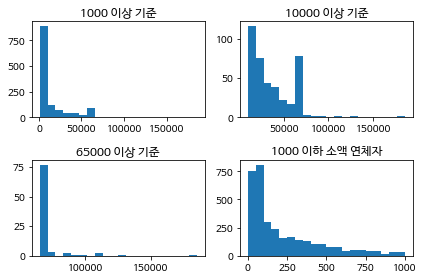

In [5]:
# 대출자가 현재 연체 중인 계좌에 대한 연체 금액입니다.
# 65000 에 73명으로 최다 명수가 모여있음 (고액 연체자 한). 
# 1. 1000 이상 기준으로 나눈 그래프 1개 
# 2. 10000 이상 기준으로 나눈 그래프 1개
# 3. 65000 이상 기준으로 나눈 그래프 1개 
# 4. 1000 이하의 소액 연체 금액 보유자 그래프 1개

lclb_2 = lclb[lclb['delinq_amnt'] != 0]
d_1 = lclb_2[lclb_2['delinq_amnt'] >= 1000]
d_2 = lclb_2[lclb_2['delinq_amnt'] >= 10000]
d_3 = lclb_2[lclb_2['delinq_amnt'] >= 65000]
d_4 = lclb_2[lclb_2['delinq_amnt'] < 1000]
plt.subplot(2, 2, 1) 
plt.hist(d_1['delinq_amnt'] , bins = 20)
plt.title('1000 이상 기준')

plt.subplot(2, 2, 2) 
plt.hist(d_2['delinq_amnt'] , bins = 20)
plt.title('10000 이상 기준')

plt.subplot(2, 2, 3) 
plt.hist(d_3['delinq_amnt'] , bins = 20)
plt.title('65000 이상 기준')

plt.subplot(2, 2, 4) 
plt.hist(d_4['delinq_amnt'] , bins = 20)
plt.title('1000 이하 소액 연체자')

plt.tight_layout()
plt.show()

Charge-off 0인 사람 수: 9246


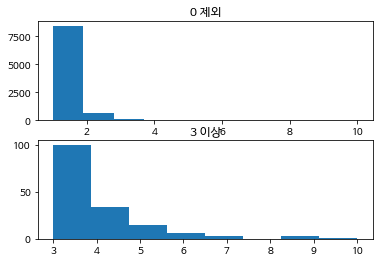

In [38]:
# 12개월 중 Charge off 한 이력 (0 ~ 10 Vary)
# 0인 사람들 상당 수, 1번 이상중엔 한 번이 가장 많음. 

print('Charge-off 0인 사람 수:', len(lclb[lclb['chargeoff_within_12_mths'] != 0]))
lclb_3 = lclb[lclb['chargeoff_within_12_mths'] != 0]
c_1 = lclb_3[lclb_3['chargeoff_within_12_mths'] > 2]
plt.subplot(2,1, 1)
plt.hist(lclb_3.chargeoff_within_12_mths)
plt.title('0 제외')

plt.subplot(2,1, 2)
plt.hist(c_1.chargeoff_within_12_mths, bins = 8)
plt.title('3 이상')

plt.show()

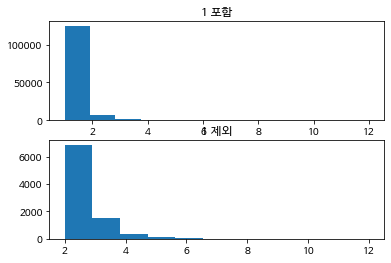

In [50]:
# 파산 이력 (0 ~ 12 Vary)
# 0인 사람들 상당 수, 1번 이상중엔 한 번이 가장 많음. 

lclb_4 = lclb[lclb['pub_rec_bankruptcies'] != 0]
p_1 = lclb_4[lclb_4['pub_rec_bankruptcies'] > 1]

plt.subplot(2,1, 1)
plt.hist(lclb_4['pub_rec_bankruptcies'], bins = 12)
plt.title('1 포함')

plt.subplot(2,1, 2)
plt.hist(p_1['pub_rec_bankruptcies'], bins= 11)
plt.title('1 제외')
plt.show()

계좌 잔고가 $0인 사람 수: 164


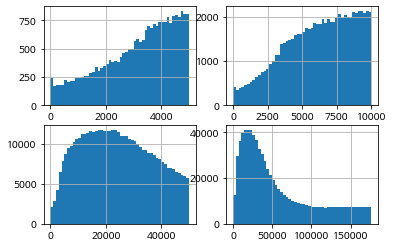

In [87]:
# 'tot_cur_bal' : 모든 계좌 잔고
# 돈이 많은 사람도 있네요. 
# 정확하진 않지만 $10000 ~ $30000 정도 가지고 있는 사람이 가장 많네요. 

t_1 = lclb[lclb['tot_cur_bal'] == 0]
t_2 = lclb[lclb['tot_cur_bal'] != 0]
t_3 = t_2[t_2['tot_cur_bal'] < 5000]
t_4 = t_2[t_2['tot_cur_bal'] < 10000]
t_5 = t_2[t_2['tot_cur_bal'] < 50000]
t_6 = t_2[t_2['tot_cur_bal'] < 176553+1]

plt.subplot(2,2, 1)
t_3.tot_cur_bal.hist(bins = 50)
plt.subplot(2,2, 2)
t_4.tot_cur_bal.hist(bins = 50)
plt.subplot(2,2, 3)
t_5.tot_cur_bal.hist(bins = 50)
plt.subplot(2,2, 4)
t_6.tot_cur_bal.hist(bins = 50)


print("계좌 잔고가 $0인 사람 수:",len(t_1['tot_cur_bal'] == 0))

갚을 돈이 $0인 사람 수: 922879


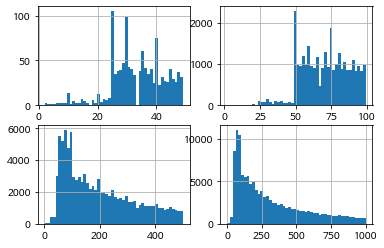

In [91]:
# 'tot_coll_amt' : 모든 계좌 잔고
# 돈이 많은 사람도 있네요. 
# 정확하진 않지만 $10000 ~ $30000 정도 가지고 있는 사람이 가장 많네요. 

m_1 = lclb[lclb['tot_coll_amt'] == 0]
m_2 = lclb[lclb['tot_coll_amt'] != 0]
m_3 = m_2[m_2['tot_coll_amt'] < 50]
m_4 = m_2[m_2['tot_coll_amt'] < 100]
m_5 = m_2[m_2['tot_coll_amt'] < 500]
m_6 = m_2[m_2['tot_coll_amt'] < 1000]

plt.subplot(2,2, 1)
m_3.tot_coll_amt.hist(bins = 50)
plt.subplot(2,2, 2)
m_4.tot_coll_amt.hist(bins = 50)
plt.subplot(2,2, 3)
m_5.tot_coll_amt.hist(bins = 50)
plt.subplot(2,2, 4)
m_6.tot_coll_amt.hist(bins = 50)


print("갚을 돈이 $0인 사람 수:",len(m_1['tot_coll_amt'] == 0)) # 다 갚거나 대출 못받거나? 

In [94]:
# 소정의 빚이 남은 사람이 다수. 
lclb.tot_coll_amt.value_counts(ascending=False).head(10)

0      922879
50       2261
100      1831
75       1416
200      1022
150      1005
60        977
70        815
80        789
55        696
Name: tot_coll_amt, dtype: int64